In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
import time
from pennylane import numpy as np
from tensorflow import keras
from functools import wraps

In [13]:
logging.basicConfig(filename='4x4_training_per_naujo.txt', level=logging.INFO, 
                    format='%(asctime)s - %(message)s')

# Filter out PennyLane's DEBUG messages
logging.getLogger("pennylane").setLevel(logging.WARNING)

def log_execution_time(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        logging.info(f"Function '{func.__name__}' started")

        result = func(*args, **kwargs) 

        end_time = time.time()
        execution_time = end_time - start_time
        logging.info(f"Function '{func.__name__}' finished in {execution_time:.2f} seconds")
        return result
    return wrapper

## Loading processed data

Loading in preprocessed data from quantum convolution computations.

In [14]:
n_epochs = 1000
n_layers = 1
n_train = 1000
n_test = 200

SAVE_PATH = "dataset/quanvolution/" 
PREPROCESS = True
np.random.seed(0)
tf.random.set_seed(0)

In [15]:
cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_dataset.load_data()

train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels= test_labels[:n_test]

train_images = train_images / 255
test_images = test_images / 255

In [16]:
q_train_images = np.load(SAVE_PATH + "4x4_final_train_cifar.npy")
q_test_images = np.load(SAVE_PATH + "4x4_final_test_cifar.npy")

## Constructing model

Constructing TensorFlow model with 2 layers.
Initializing said model and training it.

In [17]:
def MyQuantumModel():
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

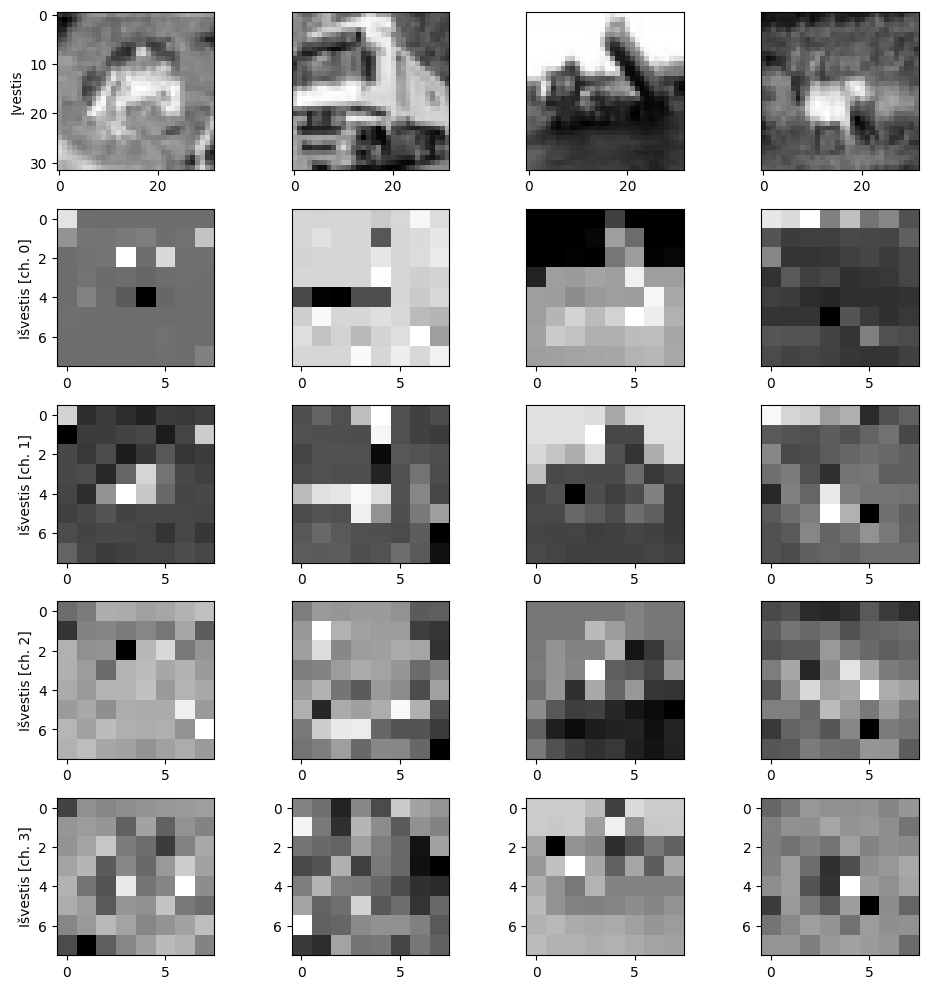

In [18]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Įvestis")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Išvestis [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

## Training model

Training neural network with preprocessed data from quanum konvolutional layers.

In [19]:
@log_execution_time
def RunQCNN():
    model = MyQuantumModel()

    history = model.fit(
        q_train_images,
        train_labels,
        validation_data=(q_test_images, test_labels),
        batch_size=20,
        epochs=n_epochs,
        verbose=2,
        shuffle=True
    )

    return history

q_history = RunQCNN()

Epoch 1/1000
50/50 - 1s - loss: 2.2915 - accuracy: 0.1220 - val_loss: 2.2180 - val_accuracy: 0.1550 - 647ms/epoch - 13ms/step
Epoch 2/1000
50/50 - 0s - loss: 2.1965 - accuracy: 0.1850 - val_loss: 2.1900 - val_accuracy: 0.1850 - 189ms/epoch - 4ms/step
Epoch 3/1000
50/50 - 0s - loss: 2.1412 - accuracy: 0.2270 - val_loss: 2.1645 - val_accuracy: 0.2000 - 176ms/epoch - 4ms/step
Epoch 4/1000
50/50 - 0s - loss: 2.0958 - accuracy: 0.2740 - val_loss: 2.1450 - val_accuracy: 0.2250 - 195ms/epoch - 4ms/step
Epoch 5/1000
50/50 - 0s - loss: 2.0590 - accuracy: 0.2900 - val_loss: 2.1391 - val_accuracy: 0.2100 - 156ms/epoch - 3ms/step
Epoch 6/1000
50/50 - 0s - loss: 2.0261 - accuracy: 0.3060 - val_loss: 2.1278 - val_accuracy: 0.2200 - 249ms/epoch - 5ms/step
Epoch 7/1000
50/50 - 0s - loss: 1.9961 - accuracy: 0.3240 - val_loss: 2.1164 - val_accuracy: 0.2200 - 144ms/epoch - 3ms/step
Epoch 8/1000
50/50 - 0s - loss: 1.9696 - accuracy: 0.3400 - val_loss: 2.1128 - val_accuracy: 0.2250 - 137ms/epoch - 3ms/step

## Classical Neural Network

Training classical neural network with same number of images

In [20]:
def MyClassicalModel():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), strides=(4,4), activation='relu', padding='same', input_shape=(32, 32, 3)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation="softmax")
    ])


    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    
    return model

In [21]:
@log_execution_time
def RunCNN():
    model = MyClassicalModel()

    history = model.fit(
        train_images,
        train_labels,
        validation_data=(test_images, test_labels),
        batch_size=20,
        epochs=n_epochs,
        verbose=2,
        shuffle=True
    )

    return history

classic_history = RunCNN()

Epoch 1/1000
50/50 - 3s - loss: 2.2721 - accuracy: 0.1340 - val_loss: 2.1815 - val_accuracy: 0.2400 - 3s/epoch - 69ms/step
Epoch 2/1000
50/50 - 0s - loss: 2.0931 - accuracy: 0.2400 - val_loss: 2.0562 - val_accuracy: 0.2700 - 263ms/epoch - 5ms/step
Epoch 3/1000
50/50 - 0s - loss: 1.9682 - accuracy: 0.2970 - val_loss: 2.0130 - val_accuracy: 0.2700 - 233ms/epoch - 5ms/step
Epoch 4/1000
50/50 - 0s - loss: 1.8762 - accuracy: 0.3340 - val_loss: 2.0188 - val_accuracy: 0.2700 - 206ms/epoch - 4ms/step
Epoch 5/1000
50/50 - 0s - loss: 1.7903 - accuracy: 0.3570 - val_loss: 1.9267 - val_accuracy: 0.2650 - 201ms/epoch - 4ms/step
Epoch 6/1000
50/50 - 0s - loss: 1.7076 - accuracy: 0.3840 - val_loss: 1.9272 - val_accuracy: 0.3400 - 229ms/epoch - 5ms/step
Epoch 7/1000
50/50 - 0s - loss: 1.6431 - accuracy: 0.4330 - val_loss: 1.8659 - val_accuracy: 0.3450 - 200ms/epoch - 4ms/step
Epoch 8/1000
50/50 - 0s - loss: 1.5627 - accuracy: 0.4630 - val_loss: 1.8671 - val_accuracy: 0.2900 - 200ms/epoch - 4ms/step
Ep

## Visualising results

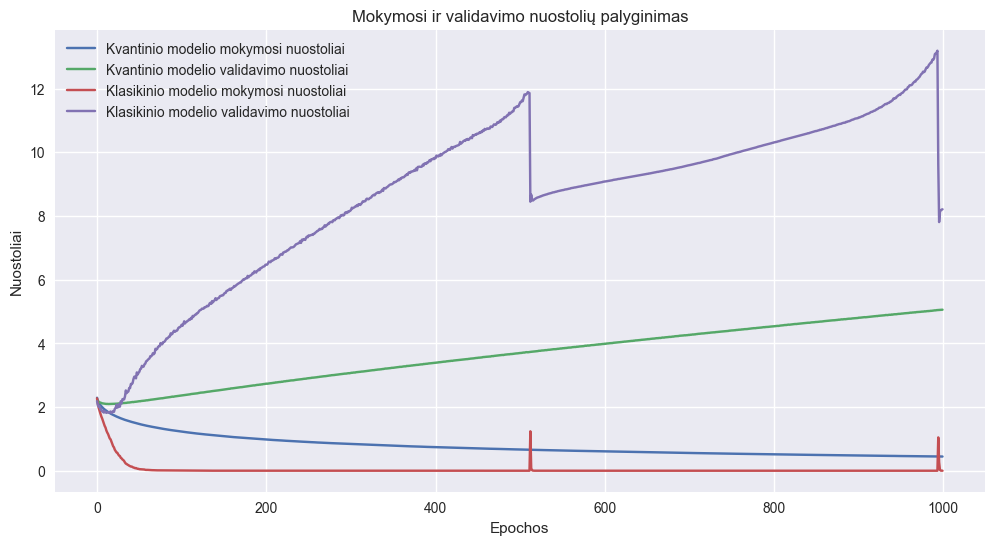

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(q_history.history['loss'], label='Kvantinio modelio mokymosi nuostoliai')
plt.plot(q_history.history['val_loss'], label='Kvantinio modelio validavimo nuostoliai')
plt.plot(classic_history.history['loss'], label='Klasikinio modelio mokymosi nuostoliai')
plt.plot(classic_history.history['val_loss'], label='Klasikinio modelio validavimo nuostoliai')
plt.xlabel('Epochos')
plt.ylabel('Nuostoliai')
plt.title('Mokymosi ir validavimo nuostolių palyginimas')
plt.legend()
plt.show()

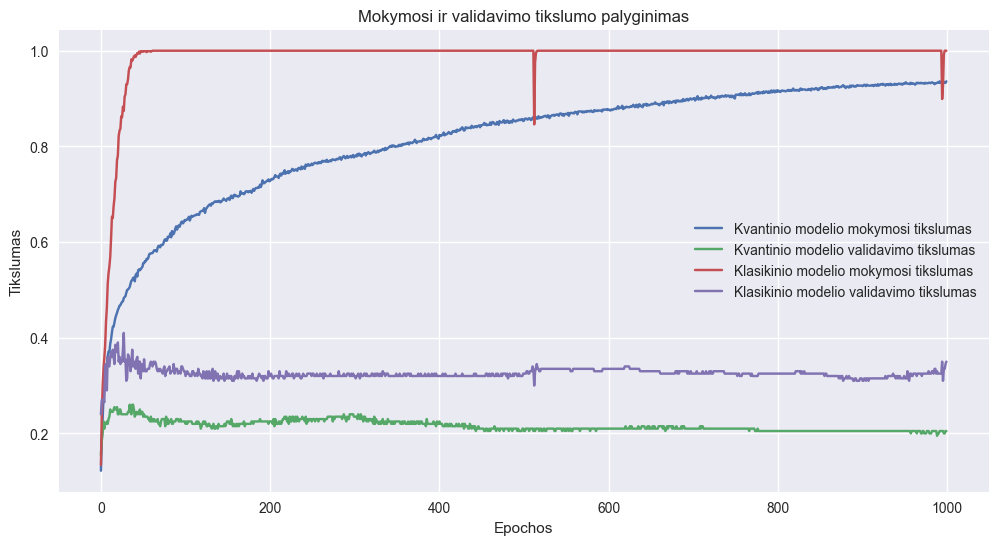

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(q_history.history['accuracy'], label='Kvantinio modelio mokymosi tikslumas')
plt.plot(q_history.history['val_accuracy'], label='Kvantinio modelio validavimo tikslumas')
plt.plot(classic_history.history['accuracy'], label='Klasikinio modelio mokymosi tikslumas')
plt.plot(classic_history.history['val_accuracy'], label='Klasikinio modelio validavimo tikslumas')
plt.xlabel('Epochos')
plt.ylabel('Tikslumas')
plt.title('Mokymosi ir validavimo tikslumo palyginimas')
plt.legend()
plt.show()